<a href="https://colab.research.google.com/github/Minch13r/DeepLearn/blob/main/%EC%A0%84%EB%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
import warnings

In [14]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv"
df = pd.read_csv(url)

df


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [16]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

X = df.drop('Rings', axis=1)
y_classification = (df['Rings'] > df['Rings'].mean()).astype(int)
y_regression = df['Rings']

In [17]:
# 데이터 분할
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.25, random_state=0)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.25, random_state=0)

In [18]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [19]:
# CNN 입력 형태 변경
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# LSTM 입력 형태 변경
X_train_lstm = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])

In [20]:
# CNN 모델 정의 (분류)
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류를 위한 출력층
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# CNN 모델 학습 (분류)
cnn_model.fit(X_train_cnn, y_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# CNN 모델 평가 (분류)
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = (cnn_pred > 0.5).astype(int).reshape(-1)

print("\n--- CNN Classifier ---")
print("Accuracy:", accuracy_score(y_test_cls, cnn_pred_classes))
print(confusion_matrix(y_test_cls, cnn_pred_classes))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6842 - loss: 0.5933 - val_accuracy: 0.7321 - val_loss: 0.5228
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7584 - loss: 0.4958 - val_accuracy: 0.7448 - val_loss: 0.4995
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7734 - loss: 0.4752 - val_accuracy: 0.7576 - val_loss: 0.4818
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7803 - loss: 0.4568 - val_accuracy: 0.7671 - val_loss: 0.4731
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7783 - loss: 0.4503 - val_accuracy: 0.7608 - val_loss: 0.4653
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7963 - loss: 0.4250 - val_accuracy: 0.7719 - val_loss: 0.4596
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7873 - loss: 0.4498 - val_accuracy: 0.7640 - val_loss: 0.4662
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8018 - loss: 0.4224 - val_accuracy: 0.7783 - val_loss:

LSTM 모델 정의 및 학습 (분류)

In [21]:
# LSTM 모델 정의 (분류)
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_lstm, y_train_cls, epochs=10, batch_size=32, validation_split=0.2)

lstm_pred = lstm_model.predict(X_test_lstm)
lstm_pred_classes = (lstm_pred > 0.5).astype(int).reshape(-1)

print("\n--- LSTM Classifier ---")
print("Accuracy:", accuracy_score(y_test_cls, lstm_pred_classes))
print(confusion_matrix(y_test_cls, lstm_pred_classes))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6609 - loss: 0.6391 - val_accuracy: 0.7241 - val_loss: 0.5306
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7437 - loss: 0.4973 - val_accuracy: 0.7368 - val_loss: 0.5144
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7538 - loss: 0.4904 - val_accuracy: 0.7368 - val_loss: 0.4945
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7693 - loss: 0.4656 - val_accuracy: 0.7464 - val_loss: 0.4819
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7827 - loss: 0.4560 - val_accuracy: 0.7687 - val_loss: 0.4635
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8011 - loss: 0.4342 - val_accuracy: 0.7847 - val_loss: 0.4535
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7998 - loss: 0.4379 - val_accuracy: 0.7783 - val_loss: 0.4523
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8131 - loss: 0.4044 - val_accuracy: 0.7735 - val_loss:

회귀 모델 정의 및 학습

In [22]:
# CNN 모델 정의 (회귀)
cnn_reg_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_reg_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_reg_model.compile(optimizer='adam', loss='mean_squared_error')

cnn_reg_model.fit(X_train_reg_scaled.reshape(-1, X_train_reg_scaled.shape[1], 1), y_train_reg, epochs=10, batch_size=32, validation_split=0.2)

cnn_reg_pred = cnn_reg_model.predict(X_test_reg_scaled.reshape(-1, X_test_reg_scaled.shape[1], 1))
print("\n--- CNN Regressor ---")
print("MSE:", mean_squared_error(y_test_reg, cnn_reg_pred))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 84.6377 - val_loss: 16.8586
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15.4489 - val_loss: 10.9623
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6205 - val_loss: 8.4730
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3308 - val_loss: 7.1264
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8969 - val_loss: 6.4868
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4526 - val_loss: 5.9051
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7615 - val_loss: 5.6223
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3691 - val_loss: 5.4983
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3867 - val_loss: 5.3431
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5529 - val_loss: 5.3226
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

--- CNN Regressor ---
MSE: 5.101448597221773


시각화

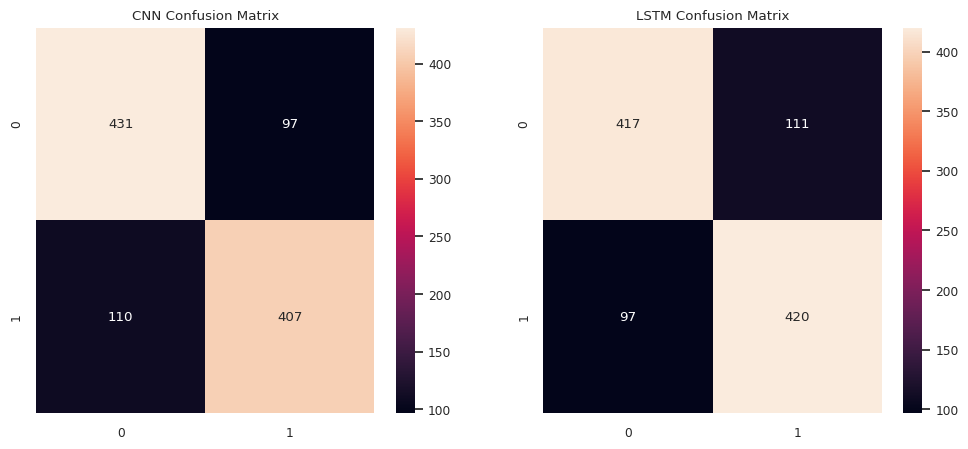

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('CNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test_cls, cnn_pred_classes), annot=True, fmt='d')

plt.subplot(1, 2, 2)
plt.title('LSTM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test_cls, lstm_pred_classes), annot=True, fmt='d')
plt.show()




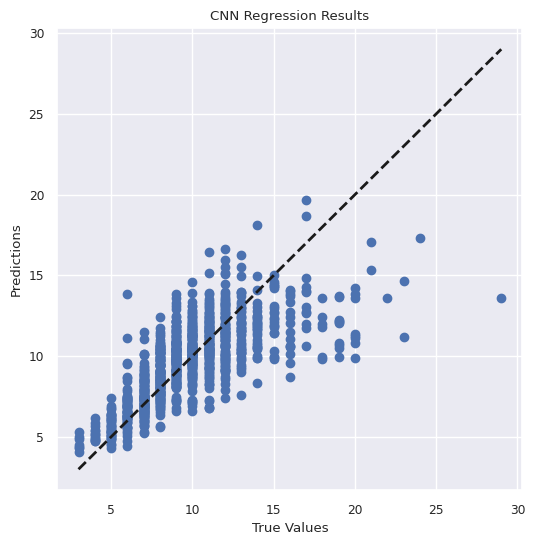

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, cnn_reg_pred)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('CNN Regression Results')
plt.show()

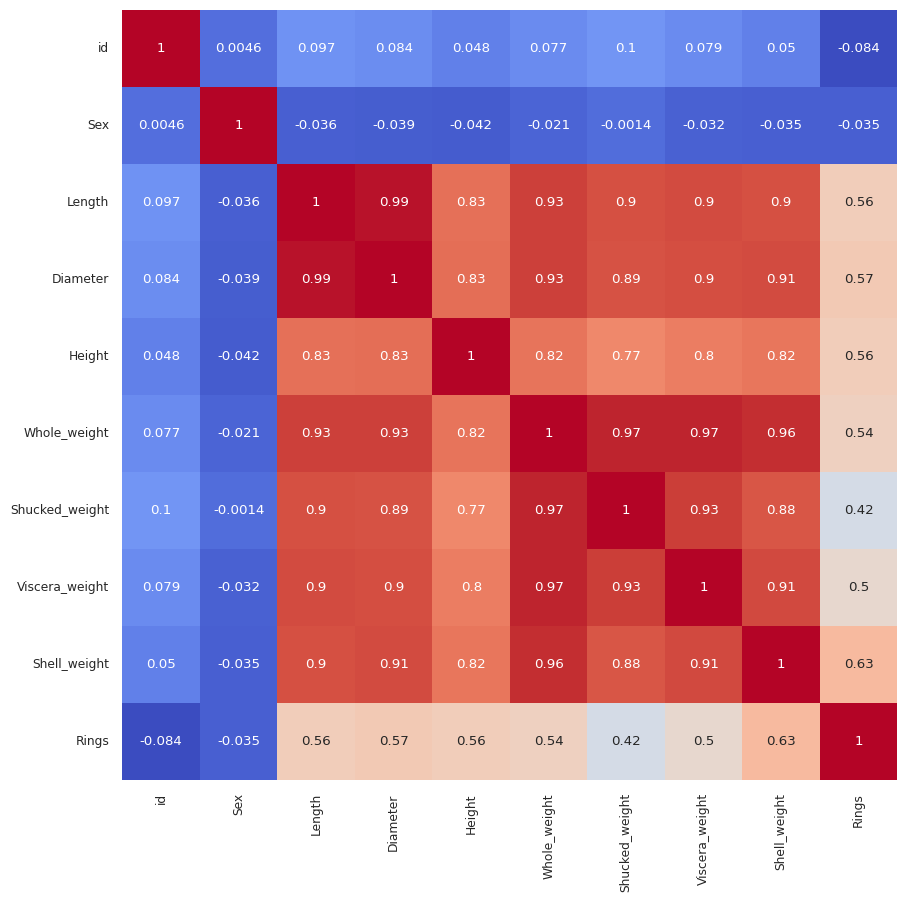

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap='coolwarm')
plt.show()
